In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons
from sklearn.metrics import accuracy_score

%matplotlib inline

((1000,), (1000, 2))

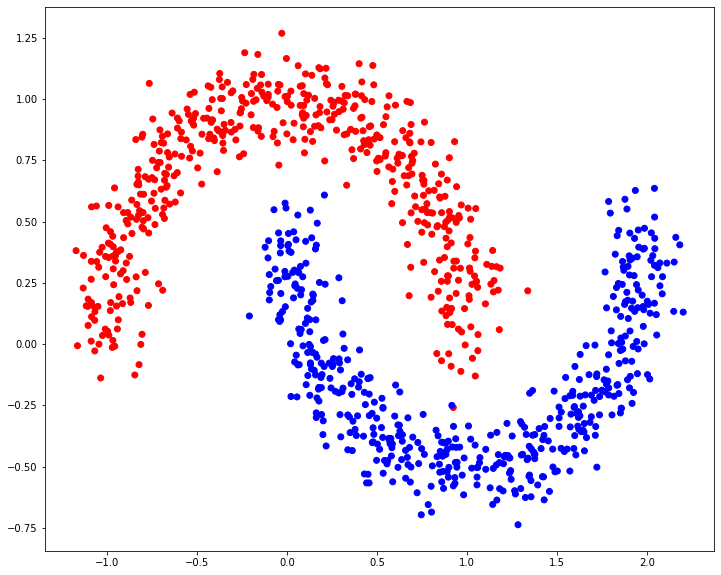

In [2]:
#create test dataset
X, y = make_moons(n_samples=1000, noise=0.1, random_state=0)
colors = ['blue' if label == 1 else 'red' for label in y]
plt.figure(figsize=(12,10))
plt.scatter(X[:,0], X[:,1], color=colors)
y.shape, X.shape

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

Create a simple Artificial Neural Network to classify the dataset. This network has 1 hidden layer of size 5 with Tanh activation

Input layer (2) => Hidden layer (5) => Output layer (1)

The steps are:

Input layer (2 neurons)

Fully connected 1 (2 input neurons, 5 output neurons)

Activation Tanh

Fully connected 2 (5 input neurons, 1 output neurons)

Activation Sigmoid

In [6]:
#Create a simple neural network in pytorch:

model = nn.Sequential( #a sequence of layers in pytorch
    nn.Linear(2, 5), #Fully Connected layer in pytorch
    nn.Tanh(), #Tanh activation 
    nn.Linear(5, 1),
    nn.Sigmoid() #Sigmoid activation
)
print(model)

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Tanh()
  (2): Linear(in_features=5, out_features=1, bias=True)
  (3): Sigmoid()
)


In [7]:
# test the output for the model

#create a test vector named x
x_sample = torch.Tensor([1,2])

#make x run through model
model(x_sample)

tensor([0.5387], grad_fn=<SigmoidBackward>)

In [8]:
#Define loss criterion in Binary Cross Entropy loss
criterion = nn.BCELoss()

#Define the Adam optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [10]:
def model_predict(x):
    pred = model(x)
    res = []
    # pred is in form of probs for each sample of x
    # => prediction is 1 if pred >= 0.5 and 0 otherwise
    for t in pred:
        if t[0]>=0.5:
            res.append(1)
        else:
            res.append(0)
    return torch.tensor(res)

In [11]:
#convert datasets to tensor in pytorch
X_tensor = torch.from_numpy(X).type(torch.FloatTensor)
y_tensor = torch.from_numpy(y).type(torch.FloatTensor)

E:\Anaconda\lib\site-packages\torch\nn\modules\loss.py:498: UserWarning: Using a target size (torch.Size([1000])) that is different to the input size (torch.Size([1000, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


currently at iterations step 500, loss is 0.12572234869003296, accuracy is 96.3%
currently at iterations step 1000, loss is 0.012708659283816814, accuracy is 99.9%
currently at iterations step 1500, loss is 0.006212982349097729, accuracy is 99.9%
currently at iterations step 2000, loss is 0.004153493791818619, accuracy is 99.9%
currently at iterations step 2500, loss is 0.0031959922052919865, accuracy is 99.9%
currently at iterations step 3000, loss is 0.0026620584540069103, accuracy is 99.9%
currently at iterations step 3500, loss is 0.0023307004012167454, accuracy is 99.9%
currently at iterations step 4000, loss is 0.0021100519225001335, accuracy is 99.9%
currently at iterations step 4500, loss is 0.001955615123733878, accuracy is 99.9%
currently at iterations step 5000, loss is 0.0018434266094118357, accuracy is 99.8%
Done training


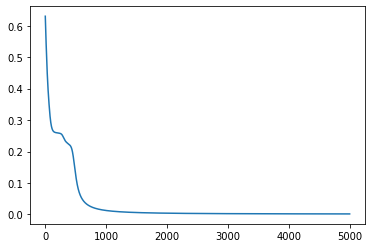

In [12]:
#define the epochs
epochs = 5000
losses = []

for i in range(epochs):
    #get the output with input X
    outputs = model(X_tensor)

    # calculate loss: Binary Cross Entropy between outputs and label
    loss = criterion(outputs, y_tensor)

    # save loss value
    losses.append(loss.item())

    # perform backpropagation
    optimizer.zero_grad() #clear all gradients value 
    loss.backward()

    # update the parameters
    optimizer.step()

    if i%500 == 499:
        accuracy = accuracy_score(model_predict(X_tensor), y_tensor)*100
        print("currently at iterations step {}, loss is {}, accuracy is {}%".format(i+1, loss.item(), round(accuracy, 2)))

print("Done training")
plt.plot(losses)

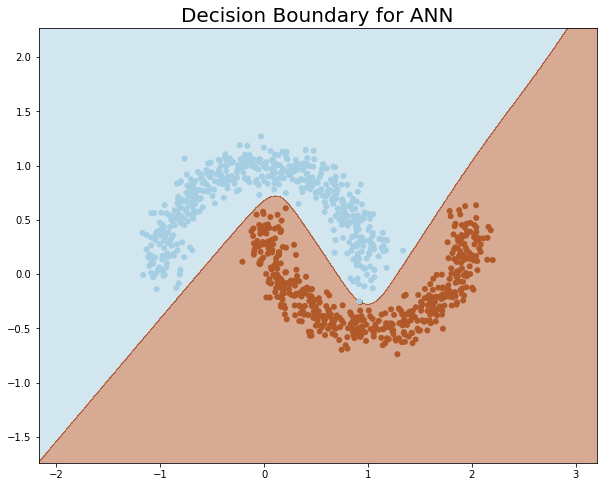

In [13]:
#plot the decision boundary

xmin, xmax = X[:,0].min() - 1, X[:,0].max() + 1
ymin, ymax = X[:,1].min() - 1, X[:,1].max() + 1
steps = 1000
x_span = np.linspace(xmin, xmax, steps)
y_span = np.linspace(ymin, ymax, steps)
xx, yy = np.meshgrid(x_span, y_span)

labels = model_predict(torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).type(torch.FloatTensor))

z = labels.reshape(xx.shape)

plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, z, cmap="Paired", alpha=0.5)
plt.title("Decision Boundary for ANN", fontsize=20)

predictions = model_predict(X_tensor)
plt.scatter(X[:,0], X[:,1], c=predictions, cmap="Paired", lw=0)


E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


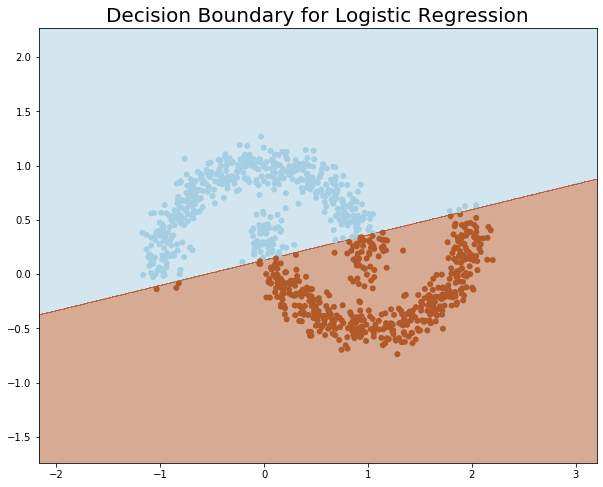

In [14]:
# make a quick Logistic Regression to compare
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(X, y)

xmin, xmax = X[:,0].min() - 1, X[:,0].max() + 1
ymin, ymax = X[:,1].min() - 1, X[:,1].max() + 1
steps = 1000
x_span = np.linspace(xmin, xmax, steps)
y_span = np.linspace(ymin, ymax, steps)
xx, yy = np.meshgrid(x_span, y_span)

labels = LR.predict(np.c_[xx.ravel(), yy.ravel()])

z = labels.reshape(xx.shape)

plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, z, cmap="Paired", alpha=0.5)
plt.title("Decision Boundary for Logistic Regression", fontsize=20)

predictions = LR.predict(X)
plt.scatter(X[:,0], X[:,1], c=predictions, cmap="Paired", lw=0)


In [15]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

# Define our model object
model = Sequential()

# Add layers to our model
model.add(Dense(output_dim=5, input_shape=(2, ), activation="tanh"))
model.add(Dense(output_dim=1, activation="sigmoid"))

model.compile(optimizer="adam", loss='binary_crossentropy')
model.summary()

history = model.fit(X, y, verbose=0, nb_epoch=10000, shuffle=True)

Using TensorFlow backend.
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_shape=(2,), activation="tanh", units=5)`
  if __name__ == '__main__':
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`
  # Remove the CWD from sys.path while we load stuff.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 15        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


E:\Anaconda\lib\site-packages\ipykernel_launcher.py:15: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  from ipykernel import kernelapp as app


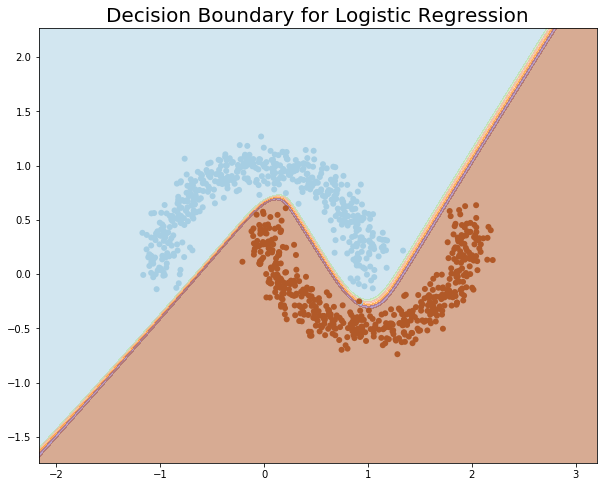

In [16]:
xmin, xmax = X[:,0].min() - 1, X[:,0].max() + 1
ymin, ymax = X[:,1].min() - 1, X[:,1].max() + 1
steps = 1000
x_span = np.linspace(xmin, xmax, steps)
y_span = np.linspace(ymin, ymax, steps)
xx, yy = np.meshgrid(x_span, y_span)

labels = model.predict(np.c_[xx.ravel(), yy.ravel()])

z = labels.reshape(xx.shape)

plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, z, cmap="Paired", alpha=0.5)
plt.title("Decision Boundary for Logistic Regression", fontsize=20)

train_labels = model.predict(X)
plt.scatter(X[:,0], X[:,1], c=y, cmap="Paired", lw=0)